In [ ]:
import pandas as pd

data = pd.read_csv('Real estate.csv')
data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [ ]:
x = data.iloc[:, 1:7]
y = data.iloc[:, 7]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [ ]:
%pip install mlxtend --upgrade

     |████████████████████████████████| 1.3 MB 7.6 MB/s 
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


Estimating bias, variance and mean squared error of Linear Regression model

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from mlxtend.evaluate.bias_variance_decomp import bias_variance_decomp
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold, GridSearchCV
import numpy as np

linear_regression = LinearRegression()
mse, bias, var = bias_variance_decomp(linear_regression, x_train.to_numpy(), y_train.to_numpy(), x_test.to_numpy(), y_test.to_numpy(), loss='mse')
y_pred = linear_regression.predict(x_test.values)

print(f'Bias of Linear Regression model: {bias}')
print(f'Variance of Linear Regression model: {var}')
print(f'MSE of Linear Regression model: {mse}')


folds = KFold(n_splits = 5, shuffle = True)
hyper_params = [{'n_features_to_select': list(range(2, 6))}]
rfe = RFE(linear_regression)             
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      
model_cv.fit(x_train, y_train) 
mse, bias, var = bias_variance_decomp(model_cv, x_train.to_numpy(), y_train.to_numpy(), x_test.to_numpy(), y_test.to_numpy(), loss='mse')

print(f'Bias of Linear Regression model: {bias}')
print(f'Variance of Linear Regression model: {var}')
print(f'MSE of Linear Regression model: {mse}')

Bias of Linear Regression model: 59.56578087130876
Variance of Linear Regression model: 2.055942472965773
MSE of Linear Regression model: 61.62172334427458
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitt

Estimating mean squared error, bias and variance depending on degrees of freedom of Polynomial Regression 

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

error_train = []
error_test = []

bias_arr = []
var_arr = []
mse_arr = []

degrees = [i for i in range(1, 5)]
for degree in degrees:
  polynomial_features = PolynomialFeatures(degree= degree)
  linear_regression = LinearRegression()
  pipeline = Pipeline([("polinomial_features", polynomial_features),
                       ("linear_regression", linear_regression)])
  pipeline.fit(x_train, y_train)

  mse, bias, var = bias_variance_decomp(pipeline, x_train.to_numpy(), y_train.to_numpy(), x_test.to_numpy(), y_test.to_numpy(), loss='mse')
  mse_arr.append(mse)
  bias_arr.append(bias)
  var_arr.append(var)

  y_pred_train = pipeline.predict(x_train.values)
  y_pred_test = pipeline.predict(x_test.values)
  error_train.append(mean_squared_error(y_train, y_pred_train))
  error_test.append(mean_squared_error(y_test, y_pred_test))


Text(0.5, 1.0, 'Dependancy of MSE from flexibility')

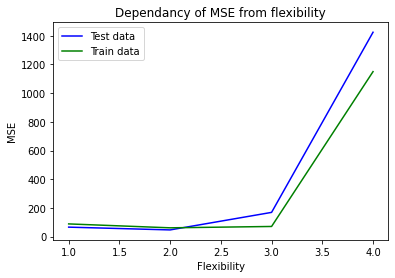

In [ ]:
import matplotlib.pyplot as plt

plt.plot(degrees, error_test, 'b-', label= 'Test data')
plt.plot(degrees, error_train, 'g-', label = 'Train data')
plt.xlabel('Flexibility')
plt.ylabel('MSE')
plt.legend()
plt.title('Dependancy of MSE from flexibility')


Text(0.5, 1.0, 'Dependancy of MSE, bias and variance from flexibility')

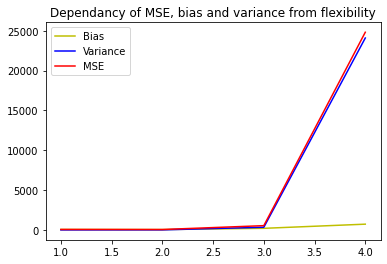

In [ ]:
plt.plot(degrees, bias_arr, '-y', label= 'Bias')
plt.plot(degrees, var_arr, '-b', label= 'Variance')
plt.plot(degrees, mse_arr, '-r', label= 'MSE')
plt.legend()
plt.title('Dependancy of MSE, bias and variance from flexibility')

Estimating bias, variance and mean squared error of Polynomial Regression model applying cross validation

In [40]:
from sklearn.model_selection import cross_val_score, cross_val_predict

error_train = []
error_test = []

bias_arr = []
var_arr = []
mse_arr = []

for degree in degrees:
  polynomial_features = PolynomialFeatures(degree= degree)
  linear_regression = LinearRegression()
  pipeline = Pipeline([("polynomial_features", polynomial_features),
                          ("linear_regression", linear_regression)])

  error_train.append(cross_val_score(pipeline, x_train, y_train, cv = 3))
  error_test.append(mean_squared_error(cross_val_predict(pipeline, x_test, y_test, cv = 4), y_test))
  
  mse, bias, var = bias_variance_decomp(pipeline, x_train.to_numpy(), y_train.to_numpy(), x_test.to_numpy(), y_test.to_numpy(), loss='mse')
  mse_arr.append(mse)
  bias_arr.append(bias)
  var_arr.append(var)

Text(0.5, 1.0, 'Dependancy of MSE from flexibility')

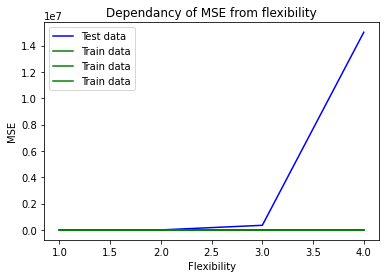

In [41]:
plt.plot(degrees, error_test, 'b-', label= 'Test data')
plt.plot(degrees, error_train, 'g-', label = 'Train data')
plt.xlabel('Flexibility')
plt.ylabel('MSE')
plt.legend()
plt.title('Dependancy of MSE from flexibility')

Text(0.5, 1.0, 'Dependancy of MSE, bias and variance from flexibility')

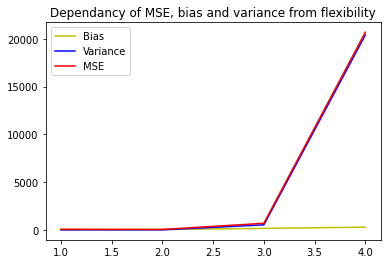

In [42]:
plt.plot(degrees, bias_arr, '-y', label= 'Bias')
plt.plot(degrees, var_arr, '-b', label= 'Variance')
plt.plot(degrees, mse_arr, '-r', label= 'MSE')
plt.legend()
plt.title('Dependancy of MSE, bias and variance from flexibility')